### Setting up the environment

In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.stats import multivariate_normal

# Load model
from pyMBstat.HIM import HIM

# The Harmonic Interaction Model

### The N-body probabilty distribution function (PDF)

\begin{align} 
P_m &\equiv P(x_1,x_2,\ldots,x_m) = \int\left|\Psi\left(x_1,x_2,\ldots,x_N\right)\right|^2dx_{m+1}dx_{m+2}\cdots dx_N \\
&= \left(\frac{\delta_N}{\pi}\right)^{\frac{m}{2}}\left(\frac{N\omega}{(N-m)\omega +m\delta_N}\right)^{\frac{1}{2}}\exp\left(-\frac{1}{N}\left(\omega+(N-1)\delta_N\right)\sum_{i=1}^mx_i^2-\frac{2}{N}
\sum_{i<j}^mx_ix_j-C_m\left(\sum_{i=1}^mx_i\right)^2\right)
\end{align}


#### where
\begin{equation*}
C_m = -\frac{1}{N}\frac{(N-m)(\omega-\delta_N)^2}{(N-m)\omega + m \delta_N} 
\end{equation*}

### Probability "Chain Rule"

\begin{equation*}
P(x_1,x_2,\ldots,x_m) = P(x_1)P(x_2|x_1)\cdots P(x_m|x_1,x_2,\ldots,x_{m-1})
\end{equation*}

### The conditional probability

\begin{align} 
P(x_m|x_1,x_2,\ldots,x_{m-1}) &= \frac{P(x_1,x_2,\ldots,x_m)}{P(x_1,x_2,\ldots,x_{m-1})}= \frac{P_m}{P_{m-1}}\\ &= \left(\frac{\delta_N}{\pi}\right)^{\frac{1}{2}}\left(1 + \frac{\omega-\delta_N}{(N-m)\omega +m\delta_N}\right)^{\frac{1}{2}}\exp\left(-\frac{1}{N}(\omega+(N-1)\delta_N)x_m^2 -\frac{1}{N}x_m\sum_{i=1}^{m-1}x_i\right)\\
&\times\exp\left( -C_mx_m^2-2C_mx_m\sum_{i=1}^{m-1}x_i-\left(\sum_{i=1}^{m-1}x_i\right)^2\left(C_m-C_{m-1}\right) \right) \\
&= \frac{1}{\sqrt{2\pi\sigma_m^2}}\exp\left(-\frac{\left(x_m-\mu_m\right)^2}{2\sigma_m^2} \right)
\end{align}


#### where
\begin{equation*}
\mu_m = \frac{\omega-\delta_N}{(m-1)\delta_N+(1-m+N)\omega}\sum_{i=1}^{m-1}x_i 
\end{equation*}
\begin{equation*}
\sigma_m^2 = \frac{m(\delta_N-\omega)+N\omega}{2\delta_N\left((m-1)\delta_N+(1-m+N)\omega\right)} 
\end{equation*}

### The reduced one-body Density

\begin{align} 
\rho_{1}(x,x^\prime) &= N \left(\frac{\delta_NN\omega/\pi}{(N-1)\omega+\delta_N}\right)^{1/2}\exp\left(-a_1\left(x^2 + x^{\prime 2} \right)+a_2xx^\prime\right) \\
&= N \left(\frac{a^2}{\pi}\right)^{1/2}\exp\left(-\frac{1}{4}\left(a^2+b^2\right)\left(x^2 + x^{\prime 2} \right)-\frac{1}{2}\left(a^2-b^2\right)xx^\prime\right)\\
&= N \left(\frac{a^2}{\pi}\right)^{1/2}\exp\left(-\frac{ab}{2}\left(x^2 + x^{\prime 2} \right)\right)\exp\left(-\frac{1}{4}\left(a-b\right)^2\left(x^2 + x^{\prime 2} \right)-\frac{1}{2}\left(a^2-b^2\right)xx^\prime\right)\\
&= N \left(\frac{a^2}{\pi}\right)^{1/2}\exp\left(-\frac{ab}{2}\left(x^2 + x^{\prime 2} \right)\right) \\
&\times
\exp\left(-\frac{(a+b)^2}{4ab}\left(\left(\frac{a-b}{a+b}\right)^2\left((\sqrt{ab}r)^2 + (\sqrt{ab}r^{\prime})^2 \right)+2\left(\frac{a-b}{a+b}\right)(\sqrt{ab}x)(\sqrt{ab}x^\prime)\right)\right)\\
&=N \left(\frac{a^2}{\pi}\right)^{1/2}\exp\left(-\frac{\alpha^2}{2}\left(x^2 + x^{\prime 2} \right)\right)
\exp\left(-\frac{z^2}{1-z^2}\left((\alpha x)^2 + (\alpha x^{\prime})^2 \right)+\frac{2z}{1-z^2}(\alpha x)(\alpha x^\prime)\right)
\end{align}

#### where
\begin{align*}
a^2 &= 2a_1 - a_2 \\
b^2 &= 2a_1 + a_2 \\
z &= -\frac{a-b}{a+b} \\
\alpha &= \sqrt{ab}
\end{align*}

#### using Mehler's formula [1]

\begin{align*}
\exp\left(-\frac{z^2}{1-z^2}(t_1^2+t_2^2) + \frac{2z}{1-z^2}t_1t_2\right) = (1-z^2)^{1/2}\sum_{n=0}^{\infty}\frac{z^n}{2^nn!}H_n(t_1)H_n(t_2)
\end{align*}

#### the reduced one-body density reads

\begin{align*}
\rho_{1}(x,x^\prime) &= N \left(\frac{a^2}{\pi}\right)^{1/2}
(1-z^2)^{1/2}\sum_{n=0}^{\infty}\frac{z^n}{2^nn!}\exp\left(-\frac{\alpha^2 x^2}{2} \right)H_n(\alpha x)\exp\left(-\frac{\alpha^2 x^{\prime 2}}{2} \right)H_n(\alpha x^\prime)\\
&= N 
\sum_{n=0}^{\infty}(1-z)z^n\varphi_n(\alpha x)\varphi_n(\alpha x^\prime)
\end{align*}

#### where we have defined the natural orbitals

\begin{align*}
\varphi_n(\alpha x) &= \left(\frac{\alpha}{\sqrt{\pi}2^nn!}\right)^{1/2}\exp\left(-\frac{\alpha^2 x^2}{2} \right)H_n(\alpha x)
\end{align*}

[1] Peter D. Robinson J. Chem. Phys. 66, 3307, (1977).


In [2]:
system = HIM(N = 10, omega = 1, Lambda = 0.1);
#system = HIM(N = 100, omega = 1, lambda0 = 0.01);
#print(system.__doc__)

--------------------------------------------------
            Harmonic Interaction Model            
--------------------------------------------------
Number of Bosons       = 10        
omega                  = 1.000000  
delta_N                = 1.105542  
Ground state energy    = 5.474937  
Uncondensed fraction   = 0.02%
Mean field interaction strength ( Lambda ) = 0.100000


### Preparing the Single-Shots

In [3]:
sshot,Psshot = system.singleshot_chainrule(numshots = 1000)

### Averaging all the Single-Shots produces the Boson Density

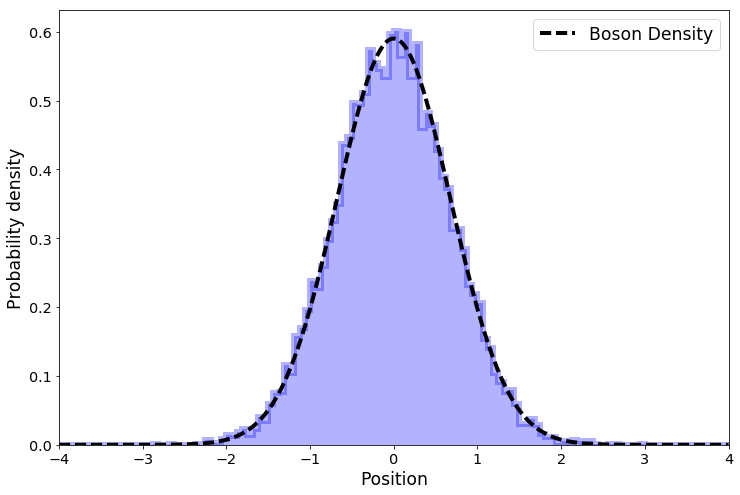

In [4]:
xmin = -4
xmax = 4
x = np.linspace(xmin,xmax,512,endpoint=True)
num_bins = 128
plt.subplots(figsize = (12,8))
plt.hist(sshot.ravel(),normed = 1, bins = num_bins, range=[xmin, xmax], alpha = 0.3, linewidth = 6, 
         color = 'b', histtype = 'step');
plt.hist(sshot.ravel(),normed = 1, bins = num_bins, range=[xmin, xmax], alpha = 0.3, linewidth = 0, 
         color = 'b', histtype = 'bar');
plt.plot(x,  system.rho1(x), linewidth = 4, color = 'k',linestyle='--', label='Boson Density');
plt.legend(fontsize = 'xx-large');
plt.xlabel('Position',fontsize = 'xx-large');
plt.ylabel('Probability density',fontsize = 'xx-large');
plt.xticks(fontsize = 'x-large');
plt.yticks(fontsize = 'x-large');
plt.xlim((xmin,xmax));

### Looking at one Single-Shot

Provided the number of particles is sufficiently large, comparing a single-shot to the boson density the level of condensation can be estimated. For fully condensed systems, a single-shot samples the density and so they should be the close even without averaging many single-shots. 

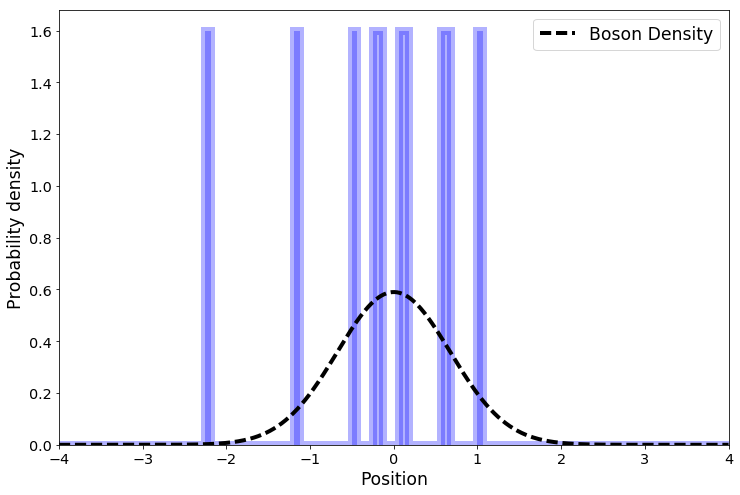

In [5]:
num_bins = 128
H = np.zeros((sshot.shape[0],num_bins))
plt.subplots(figsize = (12,8))
# Selecting a random single-shot
shot = sshot[np.random.randint(sshot.shape[0]),:];
plt.hist(shot,normed = 1, bins = num_bins, range=[xmin, xmax], alpha = 0.3, linewidth = 8, 
         color = 'b', histtype = 'step');
plt.hist(shot,normed = 1, bins = num_bins, range=[xmin, xmax], alpha = 0.3, linewidth = 8, 
         color = 'b', histtype = 'bar');
plt.plot(x,  system.rho1(x), linewidth = 4, color = 'k',linestyle='--', label='Boson Density');
plt.legend(fontsize = 'xx-large');
plt.xlabel('Position',fontsize = 'xx-large');
plt.ylabel('Probability density',fontsize = 'xx-large');
plt.xticks(fontsize = 'x-large');
plt.yticks(fontsize = 'x-large');
plt.xlim((xmin,xmax));

### Constructing an image representation of all single-shots

In [ ]:
num_bins = 128
sshot_image = np.zeros((sshot.shape[0],num_bins))
for ind in range(sshot.shape[0]): 
    sshot_image[ind,:], edges = np.histogram(sshot[ind,:], normed = 1, bins = num_bins, range=[xmin, xmax])

In [ ]:
plt.subplots(figsize = (20,200));
plt.imshow(sshot_image[:,:]); 
plt.axis('off');